# motive: implement kmeans for clustering similar article together

In [2]:
import pandas as pd 
import numpy as np 
from  sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use("fivethirtyeight")

In [10]:
vector_data = pd.read_csv('../data/vectorized/bbc_toi_yahoo_article_vectors_raw_vectors.csv')
# vector_data = vector_data.loc[:, [f"content_{i}" for i in range(300)]]

print(vector_data.shape)

vector_data.loc[:3]

(7900, 600)


,heading_0,heading_1,heading_2,heading_3,heading_4,heading_5,heading_6,heading_7,heading_8,heading_9,...,content_290,content_291,content_292,content_293,content_294,content_295,content_296,content_297,content_298,content_299
0,-0.181138,0.105518,-0.001613,0.042302,0.188017,-0.251344,0.138633,-0.105746,-0.026714,2.062196,...,-0.070241,0.014146,0.052320,-0.029596,0.028182,-0.016302,-0.026987,0.030948,-0.028944,-0.010630
1,-0.082980,0.207037,-0.051993,0.086196,0.017779,-0.175637,-0.048886,-0.011423,0.031361,1.806003,...,-0.146531,0.036746,0.053139,-0.041750,-0.033510,0.003745,-0.059683,-0.005218,-0.032703,0.045910
2,-0.104821,0.254117,-0.077556,-0.087762,0.200255,-0.112232,0.238573,-0.008179,-0.110082,1.852883,...,-0.221741,0.024740,0.069605,-0.000706,-0.019521,-0.031620,-0.040203,-0.011670,-0.036697,0.043376
3,-0.141514,0.261024,-0.117814,0.009161,-0.153140,0.129478,-0.094760,-0.259848,0.247964,0.821680,...,-0.163250,0.015745,0.095984,-0.022673,0.035397,-0.047304,-0.022237,-0.022254,0.023935,0.082706


In [11]:
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

from tqdm import tqdm
tqdm.pandas()

In [12]:
data = pd.read_csv("../data/bbc_toi_yahoo_stats_feats.csv")
data = data.loc[:, ["heading", "content"]]
data.head(3)

,heading,content
0,domestic abuse: swansea man jailed for murderi...,a man has been jailed for life for battering h...
1,covid-19: how india failed to prevent a deadly...,"in early march, india's health minister harsh ..."
2,"northampton blaze 'cruel blow', say firm's owners",two friends who spent 10 years building up the...


In [13]:
train_data = vector_data
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 11)
for k in tqdm(K):
    # Building and fitting the model
    kmeanModel = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=0.0001,
        precompute_distances='deprecated',
        verbose=0,
        random_state=None,
        copy_x=True,
        n_jobs='deprecated',
        algorithm='auto'
    )
    kmeanModel.fit(train_data)

    distortions.append(sum(np.min(cdist(train_data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / train_data.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(train_data, kmeanModel.cluster_centers_,
                                    'euclidean'), axis=1)) / train_data.shape[0]
    mapping2[k] = kmeanModel.inertia_

100%|██████████| 10/10 [00:53<00:00,  5.36s/it]


In [14]:
mapping2

{1: 32797.52032338319,
 2: 30737.837706075494,
 3: 29659.125687508156,
 4: 28963.873370402205,
 5: 28503.25986378592,
 6: 28101.85352965838,
 7: 27738.01615106823,
 8: 27432.827224675097,
 9: 27166.788676953518,
 10: 26953.19616780499}

<AxesSubplot:>

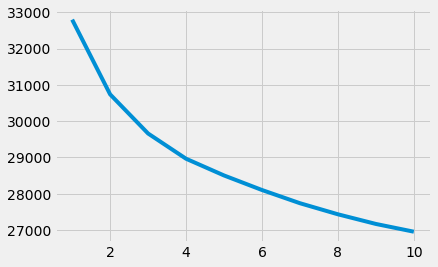

In [15]:
sns.lineplot(x=mapping2.keys(), y=mapping2.values())

In [19]:
kmeanModel = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init=10,
    max_iter=1000,
    tol=0.0001,
    precompute_distances='deprecated',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs='deprecated',
    algorithm='auto'
)
kmeanModel.fit(vector_data)
data.loc[:, "cluster_id"] = kmeanModel.labels_

,heading,content,cluster_id
3,einstein handwritten letter with equation fetc...,a letter written by albert einstein containing...,2
5,oxford university received £112m from fossil f...,oxford university has received more than £112m...,2
16,covid-19: number in work in ni remains below p...,the number of people in work in northern irela...,2
30,singapore and hong kong to open travel bubble,singapore and hong kong have agreed to start q...,2
82,deliveroo targets valuation of up to £8.8bn in...,deliveroo is seeking a valuation of between £7...,2
...,...,...,...
7894,companies garner rs 18.56 lakh crore via bse p...,new delhi: indian corporates raised over rs 18...,2
7895,"after long wait, max group sells 13% stake in ...",new delhi/mumbai: diversified max group has so...,2
7896,high court allows china's bytedance to operate...,mumbai: the bombay high court on tuesday permi...,2
7897,ajay tyagi: separation of cmd roles not aimed ...,new delhi: capital markets regulator sebi chie...,2


In [28]:
data.loc[data.loc[:, "cluster_id"] == 2][:50]

,heading,content,cluster_id
3,einstein handwritten letter with equation fetc...,a letter written by albert einstein containing...,2
5,oxford university received £112m from fossil f...,oxford university has received more than £112m...,2
16,covid-19: number in work in ni remains below p...,the number of people in work in northern irela...,2
30,singapore and hong kong to open travel bubble,singapore and hong kong have agreed to start q...,2
82,deliveroo targets valuation of up to £8.8bn in...,deliveroo is seeking a valuation of between £7...,2
101,hsbc forecasts brighter outlook as profits surge,hsbc has reported stronger than expected profi...,2
156,scottish unemployment rate remains unchanged,scotland's unemployment rate from december 202...,2
183,india covid: government says new variant linke...,india has said a new variant of the coronaviru...,2
199,east street: £10m transformation plan for bris...,a £10 million plan to revitalise a major shopp...,2
206,budweiser's £117m investment sees new jobs in ...,budweiser is investing £117m at its breweries ...,2
